#Analyze sources to check for 180 degree problem
Remove offenders

In [28]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_6years/uw972'))
from uw.like2.analyze import (sourceinfo, ); 
map(reload, (sourceinfo,));

In [29]:
self = sourceinfo.SourceInfo()

loading sources.pickle


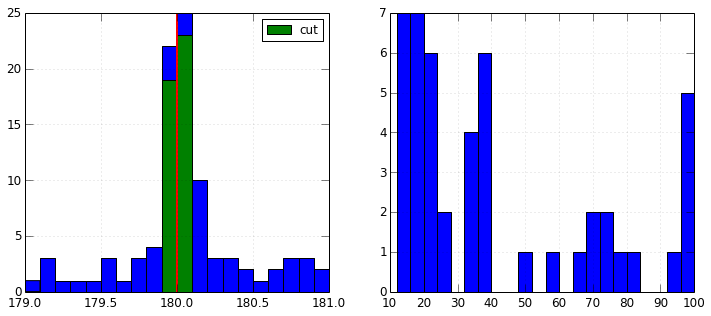

In [30]:
df = self.df
fig,axx = plt.subplots(1,2, figsize=(12,5)) #
ax=axx[0]
ax.hist(df.glon, np.linspace(179,181,21));
ax.axvline(180, color='red',lw=2)
cut = (abs(df.glon-180)<0.1) & (df.ts<100)
ax.hist(df.glon[cut], np.linspace(179,181,21), label='cut');
ax.grid(True, alpha=0.3); ax.legend()
ax=axx[1]
ax.hist(df.ts[abs(df.glon-180)<0.1].clip(0,100), np.linspace(0,100,26))
ax.grid(True, alpha=0.3)

In [40]:
names = np.asarray(list(df.index[cut]))
rois = sorted(list(set(np.asarray(df.roiname[cut]))))
len(names), names, len(rois), rois

(42, array(['P86Y0773', 'P86Y0806', 'P86Y0818', 'PGW_4180', 'S966-2963',
        'P86Y0928', 'P86Y0951', 'S966-2843', 'P86Y0976', 'P86Y0983',
        'P86Y1005', 'P86Y1023', 'S970-1464', 'P967-689', 'S966-2611',
        'P86Y1103', 'P86Y1167', 'P86Y1172', 'P86Y1182', 'P86Y1192',
        'P86Y1202', 'S966-1983', 'S971-0917', 'P86Y1274', 'P967-443',
        'S966-1569', 'P86Y1303', 'S966-1407', 'P86Y1319', 'P86Y1359',
        'P86Y1371', 'S970-587', 'P86Y1409', 'S966-977', 'P86Y1451',
        'P86Y1467', 'P86Y1481', 'P86Y1494', 'S966-764', 'P86Y1613',
        'P86Y1640', 'P86Y1889'], 
       dtype='|S9'), 12, ['HP12_0336',
  'HP12_0528',
  'HP12_0624',
  'HP12_0720',
  'HP12_0816',
  'HP12_0863',
  'HP12_0912',
  'HP12_1008',
  'HP12_1104',
  'HP12_1200',
  'HP12_1296',
  'HP12_1392'])

In [48]:
import pickle
for r in  rois:
    fname = 'pickle/%s.pickle'%r
    assert os.path.exists(fname)
    p = pickle.load(open(fname,'r'))
    for n in names: 
        sdict = p['sources']
        if n in sdict.keys():
            sdict.pop(n)
            print 'removed %s from %s' % (n,r)
        pickle.dump(p, open(fname, 'w'))

removed P86Y1889 from HP12_0336
removed P86Y1613 from HP12_0528
removed P86Y1640 from HP12_0528
removed P86Y1481 from HP12_0624
removed P86Y1494 from HP12_0624
removed S966-764 from HP12_0624
removed S970-587 from HP12_0720
removed P86Y1409 from HP12_0720
removed S966-977 from HP12_0720
removed P86Y1451 from HP12_0720
removed P86Y1467 from HP12_0720
removed S966-1569 from HP12_0816
removed P86Y1303 from HP12_0816
removed S966-1407 from HP12_0816
removed P86Y1319 from HP12_0816
removed P86Y1359 from HP12_0816
removed P86Y1371 from HP12_0816
removed P967-443 from HP12_0863
removed P86Y1192 from HP12_0912
removed P86Y1202 from HP12_0912
removed S966-1983 from HP12_0912
removed S971-0917 from HP12_0912
removed P86Y1274 from HP12_0912
removed P86Y1103 from HP12_1008
removed P86Y1167 from HP12_1008
removed P86Y1172 from HP12_1008
removed P86Y1182 from HP12_1008
removed P86Y1023 from HP12_1104
removed S970-1464 from HP12_1104
removed P967-689 from HP12_1104
removed S966-2611 from HP12_1104
re

In [49]:
!zip -f pickle.zip

freshening: pickle/HP12_0912.pickle (deflated 69%)
freshening: pickle/HP12_0624.pickle (deflated 70%)
freshening: pickle/HP12_0336.pickle (deflated 70%)
freshening: pickle/HP12_0528.pickle (deflated 70%)
freshening: pickle/HP12_1104.pickle (deflated 70%)
freshening: pickle/HP12_1008.pickle (deflated 71%)
freshening: pickle/HP12_0720.pickle (deflated 69%)
freshening: pickle/HP12_0863.pickle (deflated 70%)
freshening: pickle/HP12_1392.pickle (deflated 71%)
freshening: pickle/HP12_0816.pickle (deflated 69%)
freshening: pickle/HP12_1200.pickle (deflated 70%)
freshening: pickle/HP12_1296.pickle (deflated 70%)


In [51]:
roin = [int(r[-4:]) for r in rois]; roin

[336, 528, 624, 720, 816, 863, 912, 1008, 1104, 1200, 1296, 1392]

In [53]:
from uw.like2 import process; reload(process)
r = process.Process('.', finish=True)

Using configuration file "config.txt" in folder: /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_6years/uw972/.
Opening dataset P301_6years from key in /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/dataspec.py
invoking Data.setPhotonBinner for front/back event types...
Extracting DSS from existing binfile
GTI from binfile Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
Verified binfile /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/P8_P301/6years_4bpd.fits
no header info in ltcube?
Accepting ltcube without DSS info since legacy specified
Failed gti check:
  ltcube: Gti: 37884 intervals from 239557417 to 428689918, on time 150902856 
 binfile: Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
loading binfile /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/P8_P301/6years_4bpd.fits ... found 162070183 photons in 40 bands, energies 10-1000000 MeV
dataset "P301_6years", found in /afs/slac/g/glast/groups/catalog//pointlike/fe

80 total sources: 0 extended, 3 global
7 calls, function value, improvement, quality: 150009.1, 0.69, 0.10
Name                  index     value  error(%)  gradient
P86Y1901_Norm             0 9.681e-13      12.1       0.9
        _Index            1     2.388       4.3      -0.6
S966-393_Norm             2 5.481e-13      23.5      -0.2
        _Index            3     2.555       7.4      -1.5
P86Y1915_Norm             4 2.395e-15      39.3      -0.1
        _Index            5     1.645      16.9      -0.5
P86Y1876_Norm             6  4.37e-16      63.7      -0.6
        _Index            7     1.906      22.6      -1.6
P967-082_Norm             8 3.738e-13      45.6       0.0
        _Index            9     2.184      50.0      -0.1
        _beta            10     1.135     112.4      -0.1
2015-07-17 14:23:44 - HP12_0336 - interactive
------------------------------------------------------------------------------------------ 
	 Nearby sources within 5.0 degrees before fit, logL=150009

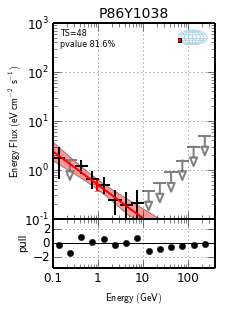

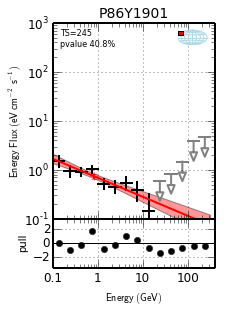

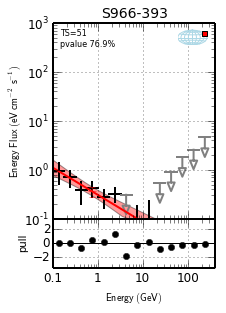

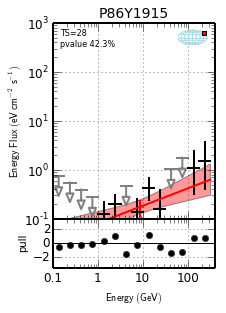

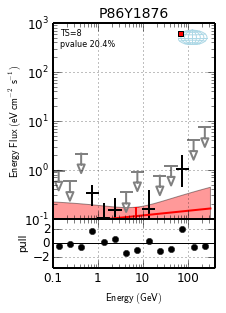

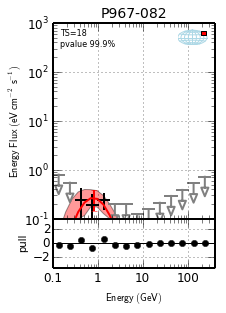

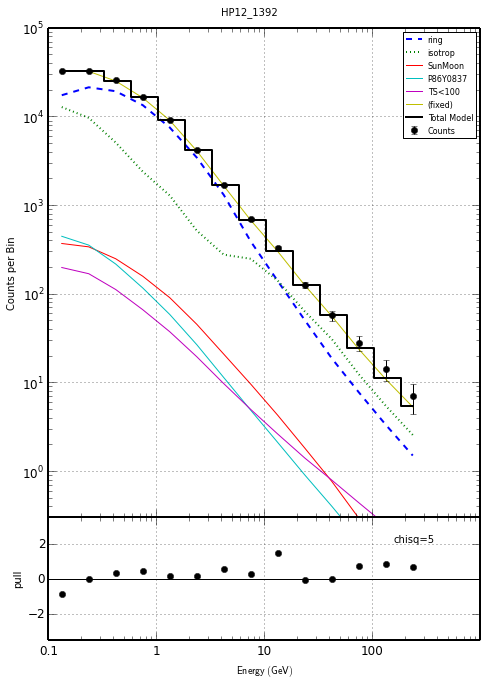

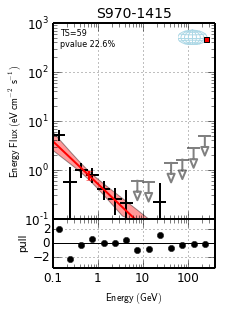

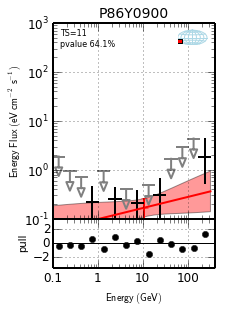

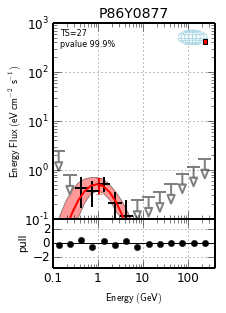

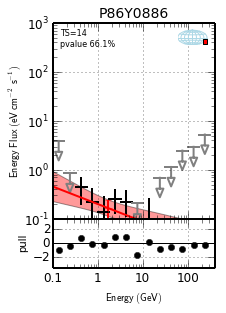

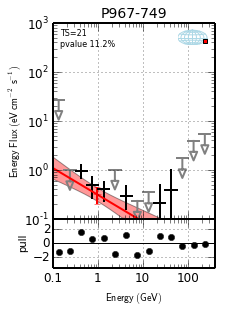

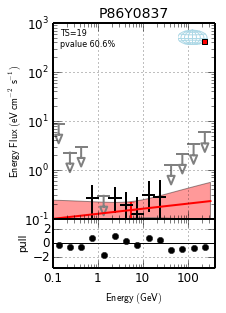

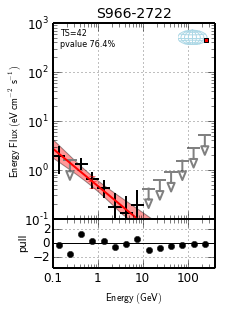

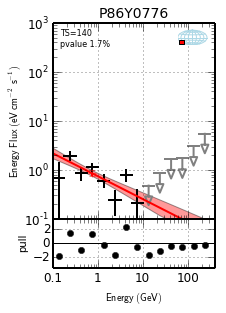

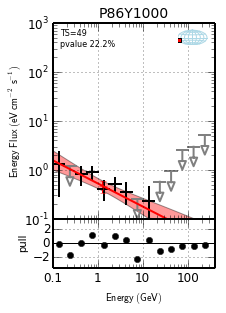

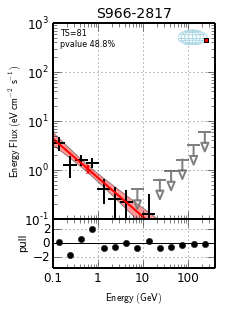

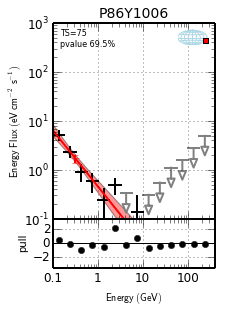

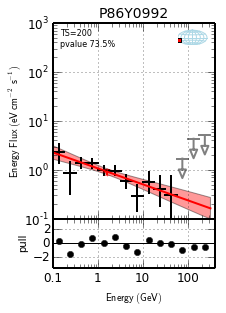

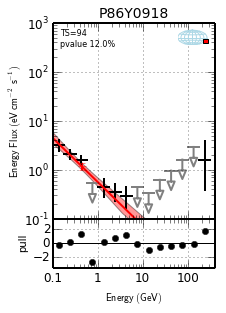

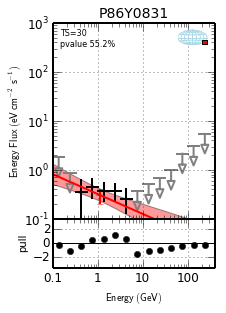

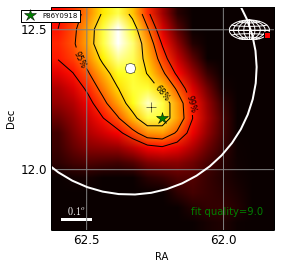

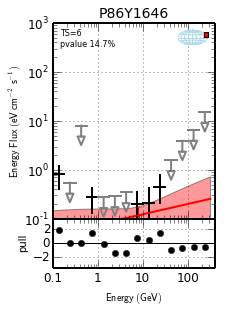

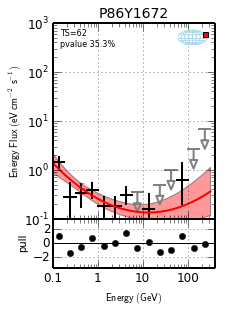

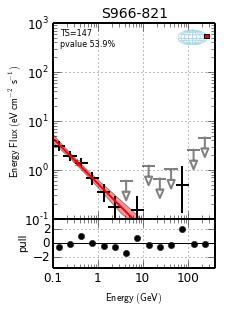

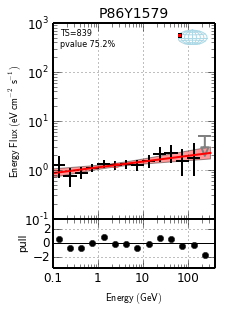

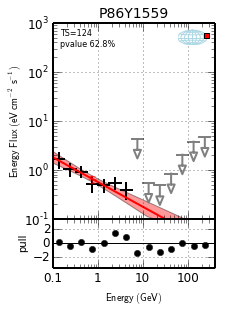

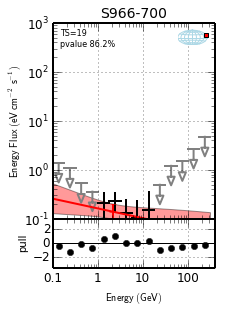

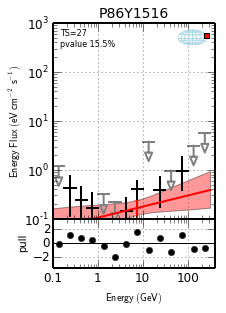

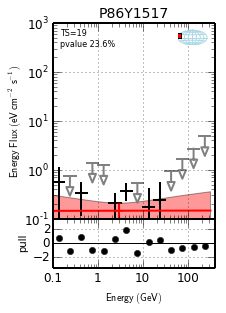

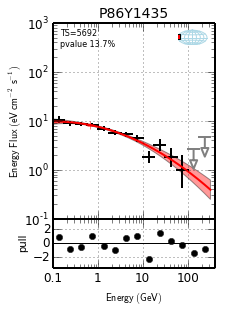

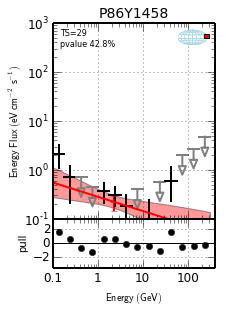

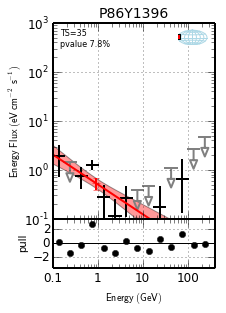

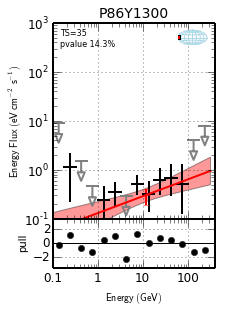

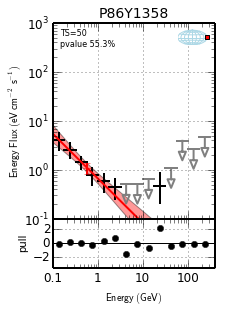

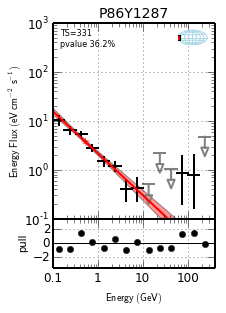

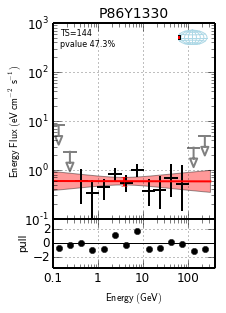

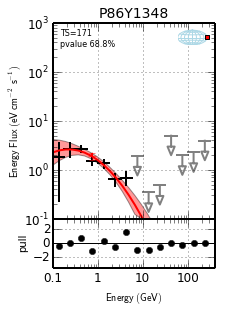

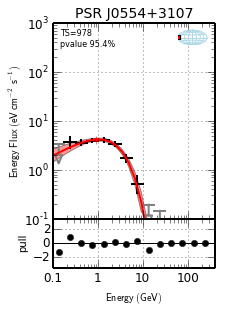

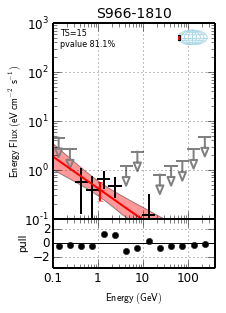

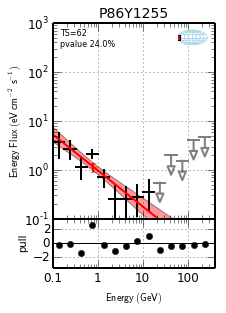

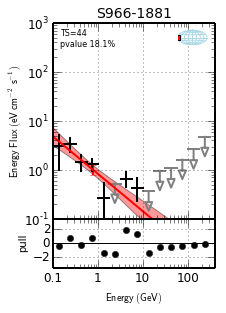

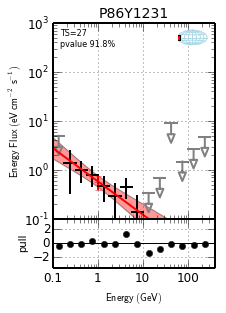

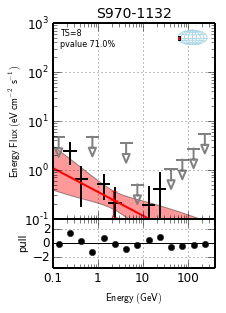

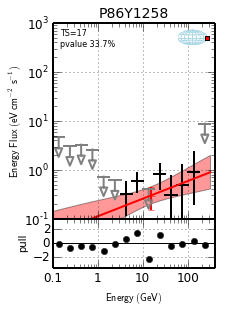

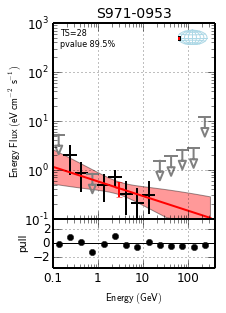

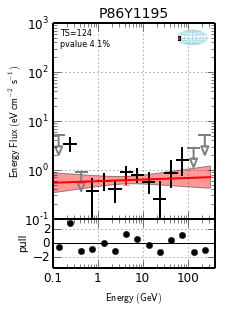

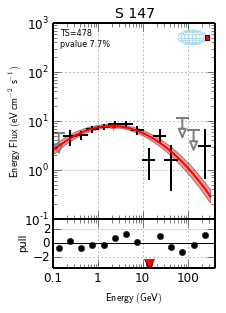

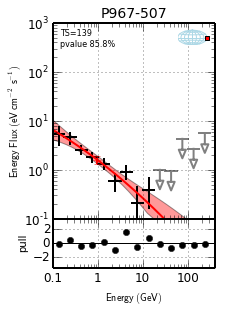

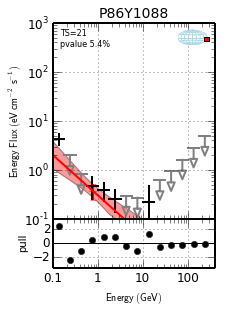

In [55]:
for roi in roin:
    r.setup_roi(roi)
    r.fit()
    r.process()

In [56]:
!zip -f pickle.zip

freshening: pickle/HP12_0912.pickle (deflated 70%)
freshening: pickle/HP12_0624.pickle (deflated 71%)
freshening: pickle/HP12_0336.pickle (deflated 70%)
freshening: pickle/HP12_0528.pickle (deflated 71%)
freshening: pickle/HP12_1104.pickle (deflated 71%)
freshening: pickle/HP12_1008.pickle (deflated 72%)
freshening: pickle/HP12_0720.pickle (deflated 70%)
freshening: pickle/HP12_0863.pickle (deflated 71%)
freshening: pickle/HP12_1392.pickle (deflated 72%)
freshening: pickle/HP12_0816.pickle (deflated 70%)
freshening: pickle/HP12_1200.pickle (deflated 71%)
freshening: pickle/HP12_1296.pickle (deflated 71%)


In [69]:
from uw.like2.pipeline import uwpipeline,stagedict,check_converge; 
map( reload, (uwpipeline, stagedict, check_converge))
stagedict.stagenames['monthly']

{'help': 'create a monthly model; followed by tables',
 'job_list': '$POINTLIKE_DIR/infrastructure/joblist.txt',
 'next': 'tables',
 'pars': {'norms_only': True},
 'proc': uw.like2.process.BatchJob,
 'sum': 'menu config counts'}